# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-03-06 12:17:18.330568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 12:17:18.476592: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 12:17:18.476608: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-06 12:17:18.906522: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

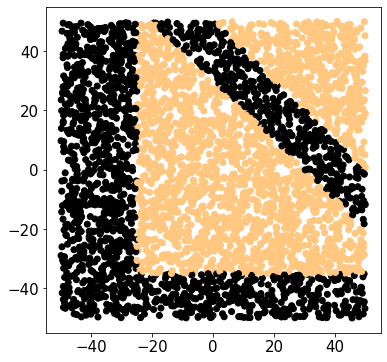

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow + Optimization method and cost function

In [8]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)


def create_model(activation='relu',optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [9]:
model_DNN = create_model()

print(model_DNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable 

### Training

In [11]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 0s - loss: 0.6685 - accuracy: 0.6500 - val_loss: 0.6326 - val_accuracy: 0.6425 - 407ms/epoch - 6ms/step
Epoch 2/400
64/64 - 0s - loss: 0.5974 - accuracy: 0.6700 - val_loss: 0.5684 - val_accuracy: 0.6725 - 69ms/epoch - 1ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5477 - accuracy: 0.6997 - val_loss: 0.5433 - val_accuracy: 0.7013 - 70ms/epoch - 1ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5216 - accuracy: 0.7166 - val_loss: 0.5201 - val_accuracy: 0.7125 - 65ms/epoch - 1ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5066 - accuracy: 0.7287 - val_loss: 0.5050 - val_accuracy: 0.7200 - 68ms/epoch - 1ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4924 - accuracy: 0.7394 - val_loss: 0.4895 - val_accuracy: 0.7300 - 75ms/epoch - 1ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4793 - accuracy: 0.7422 - val_loss: 0.4721 - val_accuracy: 0.7487 - 72ms/epoch - 1ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4692 - accuracy: 0.7469 - val_loss: 0.4564 - val_accuracy: 0.7525 - 71ms/epoch - 1ms/step
Epoch 9/400
64/

Epoch 67/400
64/64 - 0s - loss: 0.2215 - accuracy: 0.8931 - val_loss: 0.1850 - val_accuracy: 0.9262 - 72ms/epoch - 1ms/step
Epoch 68/400
64/64 - 0s - loss: 0.2209 - accuracy: 0.8978 - val_loss: 0.1859 - val_accuracy: 0.9200 - 68ms/epoch - 1ms/step
Epoch 69/400
64/64 - 0s - loss: 0.2264 - accuracy: 0.8916 - val_loss: 0.1840 - val_accuracy: 0.9225 - 87ms/epoch - 1ms/step
Epoch 70/400
64/64 - 0s - loss: 0.2182 - accuracy: 0.8975 - val_loss: 0.1858 - val_accuracy: 0.9187 - 68ms/epoch - 1ms/step
Epoch 71/400
64/64 - 0s - loss: 0.2204 - accuracy: 0.8956 - val_loss: 0.1781 - val_accuracy: 0.9250 - 66ms/epoch - 1ms/step
Epoch 72/400
64/64 - 0s - loss: 0.2197 - accuracy: 0.8941 - val_loss: 0.1858 - val_accuracy: 0.8938 - 60ms/epoch - 933us/step
Epoch 73/400
64/64 - 0s - loss: 0.2192 - accuracy: 0.8922 - val_loss: 0.1846 - val_accuracy: 0.9275 - 53ms/epoch - 821us/step
Epoch 74/400
64/64 - 0s - loss: 0.2180 - accuracy: 0.8963 - val_loss: 0.1783 - val_accuracy: 0.9175 - 54ms/epoch - 838us/step
Ep

64/64 - 0s - loss: 0.1503 - accuracy: 0.9275 - val_loss: 0.1271 - val_accuracy: 0.9388 - 51ms/epoch - 804us/step
Epoch 133/400
64/64 - 0s - loss: 0.1461 - accuracy: 0.9316 - val_loss: 0.1416 - val_accuracy: 0.9375 - 53ms/epoch - 835us/step
Epoch 134/400
64/64 - 0s - loss: 0.1418 - accuracy: 0.9300 - val_loss: 0.1497 - val_accuracy: 0.9325 - 52ms/epoch - 805us/step
Epoch 135/400
64/64 - 0s - loss: 0.1506 - accuracy: 0.9325 - val_loss: 0.1359 - val_accuracy: 0.9337 - 53ms/epoch - 827us/step
Epoch 136/400
64/64 - 0s - loss: 0.1477 - accuracy: 0.9272 - val_loss: 0.1259 - val_accuracy: 0.9388 - 67ms/epoch - 1ms/step
Epoch 137/400
64/64 - 0s - loss: 0.1411 - accuracy: 0.9353 - val_loss: 0.1298 - val_accuracy: 0.9375 - 60ms/epoch - 932us/step
Epoch 138/400
64/64 - 0s - loss: 0.1391 - accuracy: 0.9284 - val_loss: 0.1221 - val_accuracy: 0.9413 - 61ms/epoch - 950us/step
Epoch 139/400
64/64 - 0s - loss: 0.1380 - accuracy: 0.9347 - val_loss: 0.1248 - val_accuracy: 0.9362 - 66ms/epoch - 1ms/step
Ep

Epoch 197/400
64/64 - 0s - loss: 0.0757 - accuracy: 0.9663 - val_loss: 0.0583 - val_accuracy: 0.9750 - 76ms/epoch - 1ms/step
Epoch 198/400
64/64 - 0s - loss: 0.0696 - accuracy: 0.9697 - val_loss: 0.1024 - val_accuracy: 0.9613 - 87ms/epoch - 1ms/step
Epoch 199/400
64/64 - 0s - loss: 0.0729 - accuracy: 0.9706 - val_loss: 0.0542 - val_accuracy: 0.9787 - 59ms/epoch - 918us/step
Epoch 200/400
64/64 - 0s - loss: 0.0677 - accuracy: 0.9675 - val_loss: 0.0671 - val_accuracy: 0.9675 - 53ms/epoch - 822us/step
Epoch 201/400
64/64 - 0s - loss: 0.0779 - accuracy: 0.9619 - val_loss: 0.0563 - val_accuracy: 0.9750 - 53ms/epoch - 833us/step
Epoch 202/400
64/64 - 0s - loss: 0.0691 - accuracy: 0.9697 - val_loss: 0.0515 - val_accuracy: 0.9750 - 53ms/epoch - 822us/step
Epoch 203/400
64/64 - 0s - loss: 0.0649 - accuracy: 0.9694 - val_loss: 0.0656 - val_accuracy: 0.9675 - 51ms/epoch - 799us/step
Epoch 204/400
64/64 - 0s - loss: 0.0676 - accuracy: 0.9700 - val_loss: 0.0556 - val_accuracy: 0.9750 - 57ms/epoch -

Epoch 262/400
64/64 - 0s - loss: 0.0363 - accuracy: 0.9853 - val_loss: 0.0628 - val_accuracy: 0.9712 - 79ms/epoch - 1ms/step
Epoch 263/400
64/64 - 0s - loss: 0.0365 - accuracy: 0.9853 - val_loss: 0.0334 - val_accuracy: 0.9825 - 70ms/epoch - 1ms/step
Epoch 264/400
64/64 - 0s - loss: 0.0421 - accuracy: 0.9834 - val_loss: 0.0888 - val_accuracy: 0.9663 - 58ms/epoch - 913us/step
Epoch 265/400
64/64 - 0s - loss: 0.0529 - accuracy: 0.9778 - val_loss: 0.0351 - val_accuracy: 0.9825 - 58ms/epoch - 908us/step
Epoch 266/400
64/64 - 0s - loss: 0.0469 - accuracy: 0.9816 - val_loss: 0.0400 - val_accuracy: 0.9775 - 55ms/epoch - 863us/step
Epoch 267/400
64/64 - 0s - loss: 0.0359 - accuracy: 0.9856 - val_loss: 0.0391 - val_accuracy: 0.9825 - 67ms/epoch - 1ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0390 - accuracy: 0.9850 - val_loss: 0.0383 - val_accuracy: 0.9875 - 74ms/epoch - 1ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0372 - accuracy: 0.9834 - val_loss: 0.0676 - val_accuracy: 0.9712 - 59ms/epoch - 929

64/64 - 0s - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.0322 - val_accuracy: 0.9812 - 77ms/epoch - 1ms/step
Epoch 328/400
64/64 - 0s - loss: 0.0277 - accuracy: 0.9906 - val_loss: 0.0265 - val_accuracy: 0.9887 - 61ms/epoch - 948us/step
Epoch 329/400
64/64 - 0s - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0256 - val_accuracy: 0.9887 - 58ms/epoch - 906us/step
Epoch 330/400
64/64 - 0s - loss: 0.0454 - accuracy: 0.9844 - val_loss: 0.0236 - val_accuracy: 0.9912 - 62ms/epoch - 969us/step
Epoch 331/400
64/64 - 0s - loss: 0.0418 - accuracy: 0.9850 - val_loss: 0.0317 - val_accuracy: 0.9837 - 69ms/epoch - 1ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0387 - accuracy: 0.9809 - val_loss: 0.0303 - val_accuracy: 0.9837 - 77ms/epoch - 1ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.0360 - val_accuracy: 0.9775 - 60ms/epoch - 943us/step
Epoch 334/400
64/64 - 0s - loss: 0.0283 - accuracy: 0.9891 - val_loss: 0.0224 - val_accuracy: 0.9887 - 65ms/epoch - 1ms/step
Epoch 

Epoch 393/400
64/64 - 0s - loss: 0.0308 - accuracy: 0.9859 - val_loss: 0.0218 - val_accuracy: 0.9900 - 57ms/epoch - 891us/step
Epoch 394/400
64/64 - 0s - loss: 0.0246 - accuracy: 0.9881 - val_loss: 0.0283 - val_accuracy: 0.9837 - 84ms/epoch - 1ms/step
Epoch 395/400
64/64 - 0s - loss: 0.0270 - accuracy: 0.9878 - val_loss: 0.0207 - val_accuracy: 0.9912 - 69ms/epoch - 1ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0265 - accuracy: 0.9891 - val_loss: 0.0340 - val_accuracy: 0.9850 - 62ms/epoch - 972us/step
Epoch 397/400
64/64 - 0s - loss: 0.0274 - accuracy: 0.9897 - val_loss: 0.0718 - val_accuracy: 0.9725 - 59ms/epoch - 929us/step
Epoch 398/400
64/64 - 0s - loss: 0.0323 - accuracy: 0.9878 - val_loss: 0.0505 - val_accuracy: 0.9737 - 53ms/epoch - 832us/step
Epoch 399/400
64/64 - 0s - loss: 0.0328 - accuracy: 0.9859 - val_loss: 0.0198 - val_accuracy: 0.9925 - 59ms/epoch - 926us/step
Epoch 400/400
64/64 - 0s - loss: 0.0215 - accuracy: 0.9922 - val_loss: 0.0333 - val_accuracy: 0.9837 - 61ms/epoch -

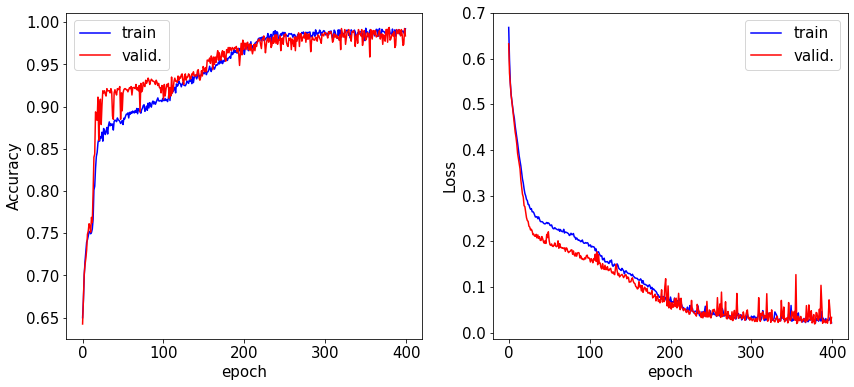

In [12]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [14]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_DNN.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 559us/step


<function matplotlib.pyplot.show(close=None, block=None)>

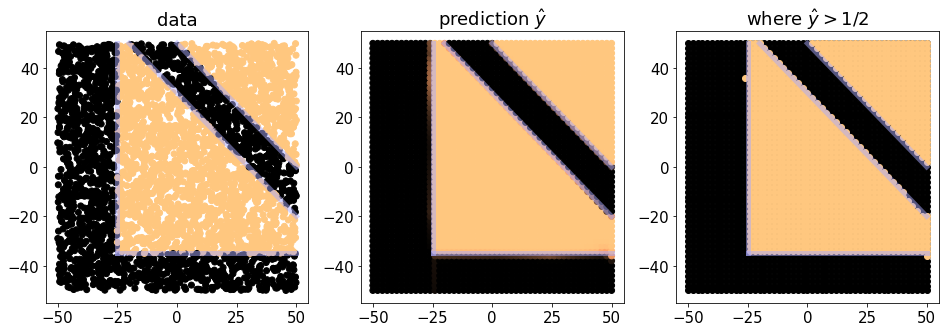

In [15]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Optimization

Grid search to find the best minimization algorithm:

In [16]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
    
    
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_model, 
                        epochs=1, 
                        batch_size=50, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/tmp/ipykernel_77061/1622468043.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=create_model,


64/64 [==============================] - 1s 868us/step - loss: 0.6833 - accuracy: 0.5359
Best: 0.668750 using {'optimizer': 'Nadam'}
0.519688 (0.049342) with: {'optimizer': 'SGD'}
0.628438 (0.035426) with: {'optimizer': 'RMSprop'}
0.516875 (0.049169) with: {'optimizer': 'Adagrad'}
0.581875 (0.054840) with: {'optimizer': 'Adadelta'}
0.660938 (0.032456) with: {'optimizer': 'Adam'}
0.633750 (0.064572) with: {'optimizer': 'Adamax'}
0.668750 (0.061853) with: {'optimizer': 'Nadam'}


Grid search to find the best activation function:

In [17]:
model = create_model()
model.compile()
model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_activation, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_77061/698850419.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


64/64 [==============================] - 0s 848us/step - loss: 0.6152 - accuracy: 0.6703
Best: 0.719364 using {'activation': 'relu'}
0.517495 (0.013583) with: {'activation': 'softmax'}
0.615589 (0.081301) with: {'activation': 'softplus'}
0.699074 (0.027657) with: {'activation': 'softsign'}
0.719364 (0.058751) with: {'activation': 'relu'}
0.684384 (0.024581) with: {'activation': 'tanh'}
0.517495 (0.013583) with: {'activation': 'sigmoid'}
0.517495 (0.013583) with: {'activation': 'hard_sigmoid'}
0.654076 (0.030101) with: {'activation': 'linear'}
